In [18]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [26]:
X, true_labels, true_centers = make_blobs(n_samples=150, centers=2, n_features=2,
                  random_state=0, return_centers=True)

In [27]:
for i in zip(true_labels, X):
    print(i)

(1, array([2.84159548, 0.43124456]))
(0, array([1.92352205, 4.14877723]))
(0, array([1.0220286 , 4.11660348]))
(0, array([1.44193252, 2.76754364]))
(1, array([1.74438135, 0.99506383]))
(1, array([0.76241061, 1.16471453]))
(0, array([1.1312175 , 4.68194985]))
(0, array([1.15369622, 3.90200639]))
(1, array([ 3.54975207, -1.17232137]))
(0, array([0.62835793, 4.4601363 ]))
(0, array([0.08848433, 2.32299086]))
(1, array([2.21177406, 1.1298447 ]))
(1, array([2.82705807, 1.72116781]))
(1, array([ 2.0159847 , -0.27042984]))
(1, array([3.00468833, 0.9852149 ]))
(0, array([-0.63762777,  4.09104705]))
(0, array([-0.73000011,  6.25456272]))
(1, array([1.956815  , 0.23418537]))
(1, array([0.63120661, 0.40434378]))
(1, array([2.57854418, 0.72611733]))
(0, array([2.47034915, 4.09862906]))
(0, array([0.87305123, 4.71438583]))
(0, array([0.34194798, 3.94104616]))
(1, array([1.40285894, 0.50671028]))
(1, array([1.4178305 , 0.50039185]))
(0, array([-0.18887976,  5.20461381]))
(1, array([2.74508569, 2.199

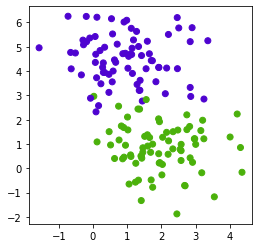

In [28]:
def visualize_clasters(X, labels, n_clusters=2):
    unique_labels = np.unique(labels)
    unique_colors = np.random.random((len(unique_labels), 3))
    colors = [unique_colors[l] for l in labels]
    plt.figure(figsize=(4, 4))
    plt.scatter(X[:, 0], X[:, 1], c=colors)
#     centroids = KMeans(n_clusters=n_clusters).fit(X)
#     plt.scatter(centroids[:, 0], centroids[:, 1], marker=r'$\clubsuit$')
    plt.show()
visualize_clasters(X, true_labels)

In [29]:
class KMeans:
    def __init__(self, n_clusters, init='random', max_iter=100):
        self.max_iter = max_iter
        self.init = init
        self.n_clusters = n_clusters
        self.centroids = np.array([])

    def fit(self, X: np.array, y=None):
        if self.init == 'sample':
            centroids_init = random.choices(X, weights=None, cum_weights=None, k=self.n_clusters)
            for _ in range(self.max_iter):

                closest_centers = np.array([np.argmin(
                    [np.linalg.norm(point - center)
                            for center in centroids_init])
                                    for point in X])

                self.centroids = [np.mean(
                        np.array([X[i] for i in range(len(X))
                                  if closest_centers[i] == j]), axis=0)
                                                        for j in range(self.n_clusters)]
                centroids_init = self.centroids

    def predict(self, X: np.array):

        labels = [np.argmin(
            [np.linalg.norm(point - center)
                            for center in self.centroids])
                                    for point in X]
        return np.array(labels)

In [30]:
kmeans = KMeans(n_clusters=2, init='sample')
kmeans.fit(X)
print(kmeans.centroids)
print(true_centers)

[array([0.89365774, 4.47827287]), array([2.03419487, 0.82574717])]
[[0.97627008 4.30378733]
 [2.05526752 0.89766366]]


[1 0 0 0 1 1 0 0 1 0 0 1 1 1 1 0 0 1 1 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 1 1 0
 1 0 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 1
 0 0 1 1 0 0 1 0 0 0 1 1 1 1 0 1 0 0 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1
 1 0 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 1
 0 1]
[1 0 0 0 1 1 0 0 1 0 0 1 1 1 1 0 0 1 1 1 0 0 0 1 1 0 1 1 1 1 1 0 0 1 1 1 0
 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 1
 0 0 1 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 1
 1 0 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 1
 0 1]


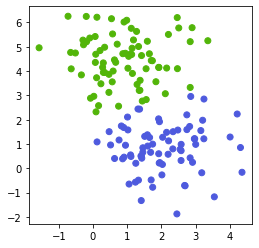

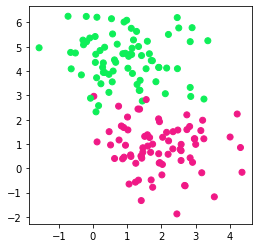

In [31]:
kmeans.fit(X)
labels = kmeans.predict(X)
print(labels)
print(true_labels)
visualize_clasters(X, labels)
visualize_clasters(X, true_labels)

In [32]:
err = np.sum(abs(labels - true_labels))/150*100
print(f"Error : {round(err)} %" )

Error : 3 %


In [41]:
from sklearn.cluster import KMeans as KMeans1
kmeans1 = KMeans1(n_clusters=2, init='random')
kmeans1.fit(X)
print(kmeans1.cluster_centers_)
print(true_centers)


[[0.89365774 4.47827287]
 [2.03419487 0.82574717]]
[[0.97627008 4.30378733]
 [2.05526752 0.89766366]]


In [43]:
labels1 = kmeans1.predict(X)
print(labels1)
print(true_labels)

[1 0 0 0 1 1 0 0 1 0 0 1 1 1 1 0 0 1 1 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 1 1 0
 1 0 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 1
 0 0 1 1 0 0 1 0 0 0 1 1 1 1 0 1 0 0 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1
 1 0 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 1
 0 1]
[1 0 0 0 1 1 0 0 1 0 0 1 1 1 1 0 0 1 1 1 0 0 0 1 1 0 1 1 1 1 1 0 0 1 1 1 0
 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 1
 0 0 1 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 1
 1 0 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 1
 0 1]


In [45]:
err1 = np.sum(abs(labels1 - true_labels))/150*100
print(f"Error : {(err1)} %" )

Error : 3.3333333333333335 %


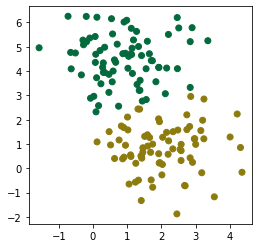

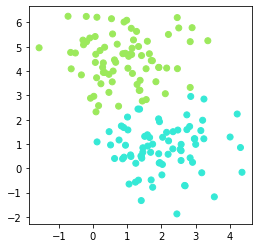

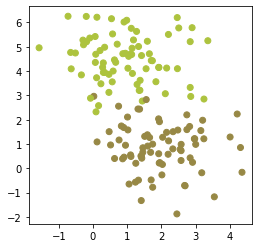

In [46]:
visualize_clasters(X, labels)
visualize_clasters(X, labels1)
visualize_clasters(X, true_labels)


